In [1]:
%matplotlib notebook
%pylab

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


In [13]:
%%bash

# Usage :  
#    $ deriv <N>
# where <N> is the number of mesh cells. 

deriv 64 2

In [14]:
# Open file for reading; use binary mode
fout = open("deriv.out","rb")

# Read meta data
dt_meta = dtype([('N','int32'),('a','d'),('b','d'),('deriv_choice','int32')])
d = fromfile(fout,dtype=dt_meta, count=1)[0]

# create dictionary containing meta data
parms = dict(zip(dt_meta.fields,d))

# Print meta data from dictionary
print("N = {N:d}\na = {a:g}\nb = {b:g}\nDerivative choice = {deriv_choice:d}".format(**parms))

# Assign values in tuple directly (for use below)
N,a,b,deriv_choice = d

# Read solution data
dt_deriv = dtype([('q','d',N)])  
data = fromfile(fout,dtype=dt_deriv,count=2)

# Close file
fout.close()

N = 64
a = 0
b = 1
Derivative choice = 2


<IPython.core.display.Javascript object>


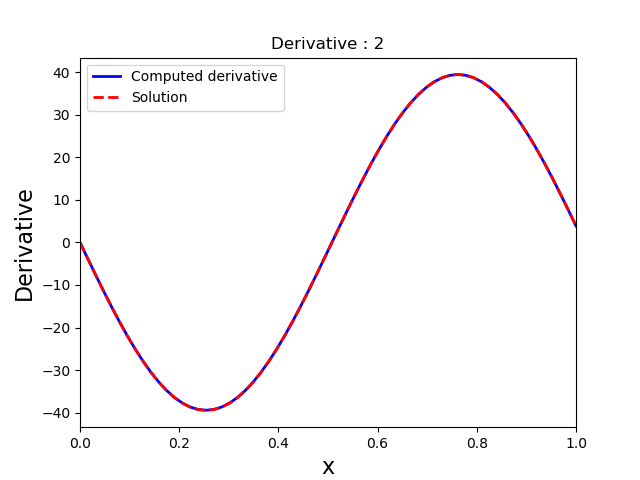

In [15]:
fig = figure(1)
clf()

soln = data[0][0]
q = data[1][0]

x = linspace(a,b,N)

plot(x,q,linewidth=2,color='b',label='Computed derivative')
plot(x,soln,linewidth=2,color='r',linestyle='--',label='Solution')

tstr = 'Derivative : {:d}'.format
htitle = title(tstr(deriv_choice))

xlabel('x',fontsize=16)
ylabel('Derivative',fontsize=16)
xlim([a,b])

legend()

fig.canvas.draw()  